In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("customersatisfaction.csv")

In [4]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


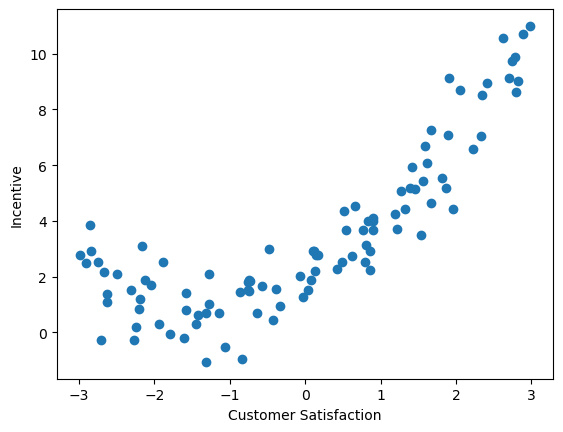

In [8]:
plt.scatter(df["Customer Satisfaction"],df["Incentive"])
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [9]:
# dependent & independent

In [10]:
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [11]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [12]:
y.head()

0     1.010513
1     2.281043
2     4.415053
3    10.563600
4     0.627365
Name: Incentive, dtype: float64

In [13]:
# train - test split

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [15]:
#Scaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
regression = LinearRegression()

In [19]:
regression.fit(X_train,y_train)

LinearRegression()

In [20]:
## prediction

In [21]:
y_pred = regression.predict(X_test)

In [22]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [23]:
score = r2_score(y_test,y_pred)
print("r2 score: ",score)

r2 score:  0.2705652535622246


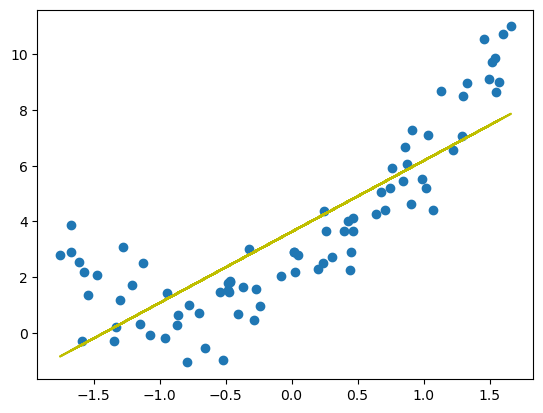

In [24]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="y")
plt.show()

In [25]:
# Lineer regresyon modelini uyguladığımız zaman istediğiimiz sonucu alamadık şimdi polynom regression denicez

In [26]:
poly = PolynomialFeatures()

In [27]:
type(poly)

sklearn.preprocessing._polynomial.PolynomialFeatures

In [28]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [29]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)

LinearRegression()

In [30]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print("r2 score: ",score)

r2 score:  0.7685687698788557


In [31]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [32]:
regression.intercept_

np.float64(2.076676429793282)

In [33]:
# new data

In [34]:
new_df = pd.read_csv("newdatas.csv")

In [35]:
new_df.head()

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [36]:
new_df.rename(columns = {"0": "Customer Satisfaction"},inplace=True)

In [37]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [38]:
X_new = new_df[["Customer Satisfaction"]]

In [39]:
X_new = scaler.fit_transform(X_new)

In [40]:
X_new_poly = poly.transform(X_new)

In [41]:
y_new = regression.predict(X_new_poly)

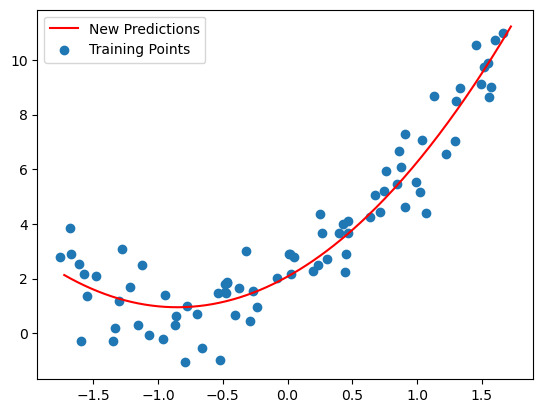

In [42]:
plt.plot(X_new,y_new,"r",label="New Predictions")
plt.scatter(X_train,y_train,label="Training Points")
plt.legend()
plt.show()

In [43]:
#pipline

In [63]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipline = Pipeline([
        ("standard_scaler",scaler),
        ("poly_featues",poly_features),
        ("lin_reg",lin_reg)   
    ])
    pipline.fit(X_train,y_train)
    score = pipline.score(X_test,y_test)
    print("R2 Score: ",score)

    y_pred_new = pipline.predict(X_new)
    plt.plot(X_new,y_pred_new,"r",label="New Predictions")
    plt.scatter(X_train,y_train,label="Training Points")
    plt.legend()
    plt.show()
    

R2 Score:  0.2705652535622246


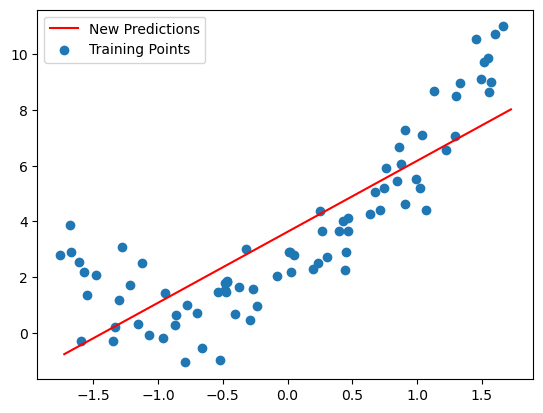

R2 Score:  0.7685687698788558


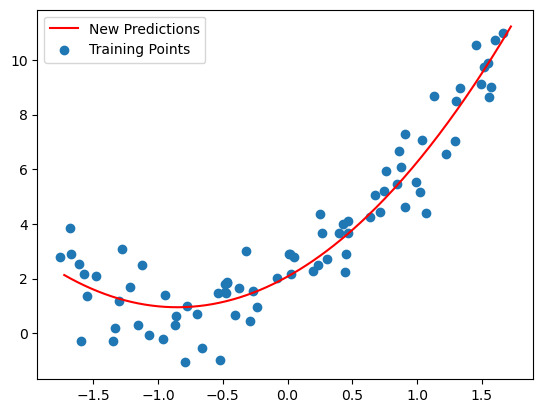

R2 Score:  0.757344362140105


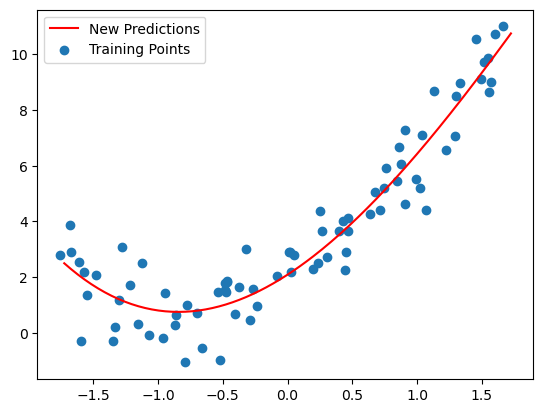

R2 Score:  0.7355034443260413


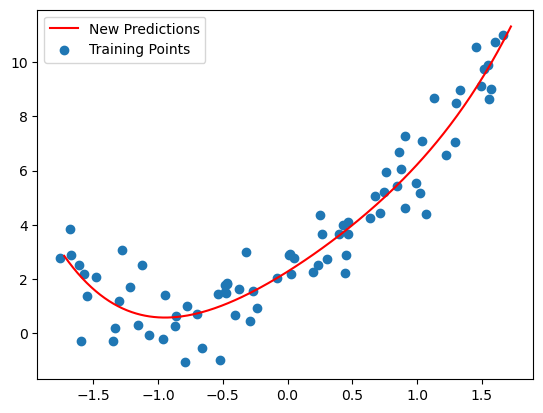

R2 Score:  0.7351244165095399


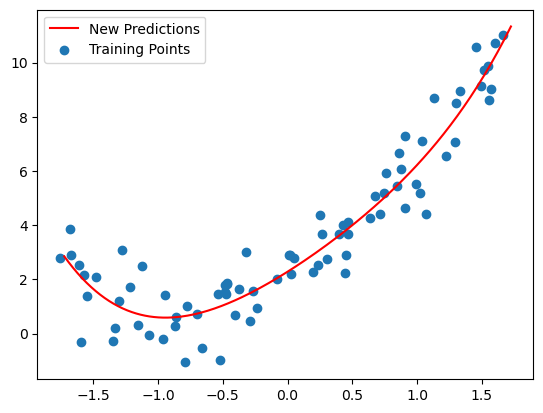

R2 Score:  0.7343590482133429


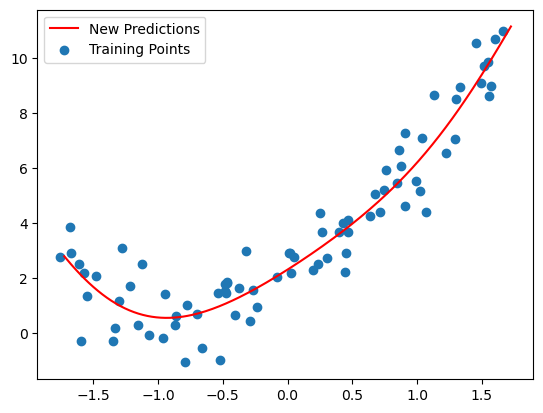

R2 Score:  0.7347819263549453


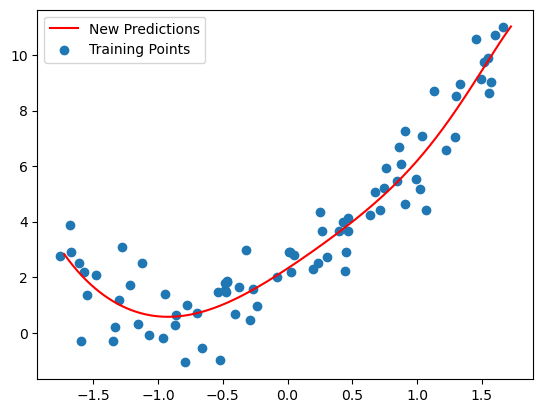

R2 Score:  0.7411422099998382


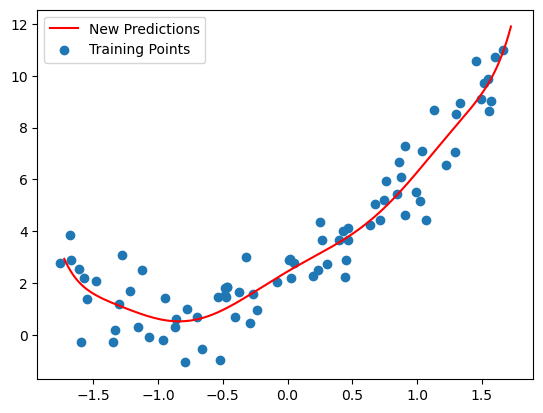

R2 Score:  0.7310763879815942


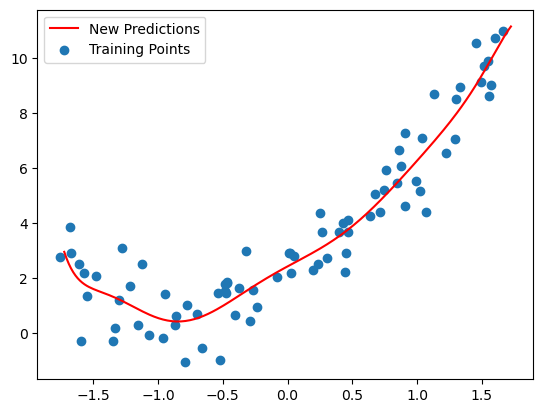

R2 Score:  0.7280578621232846


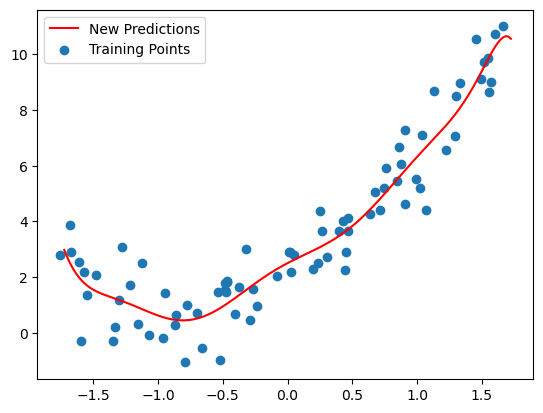

In [64]:
for degree in range(1,11):
    poly_regression(degree)